# Online Retail Customer Segmentation - Unsupervised Learning Project
#### Aqsa Anwar
**[GitHub Repository](https://github.com/aqsaakhan/CSCA-5632-Unsupervised-Algorithms-in-Machine-Learning-Final-Project)**

## 1. Introduction
This project serves as the final project for my **"[Unsupervised Algorithms in Machine Learning](https://github.com/aqsaakhan/CSCA-5632-Unsupervised-Algorithms-in-Machine-Learning-Final-Project)"** course. In this project, I aim to use unsupervised learning techniques to segment customers of an online retail business. I'll uncover patterns in customer behavior and preferences that can inform targeted marketing strategies and personalized customer engagement.

In today's highly competitive e-commerce landscape, understanding and effectively engaging with customers is crucial for business success. With companies growth their is a huge amount of data that we should look at to drive business strategies. However, the challenge lies in transforming this data into actionable insights that can drive business strategy and improve customer experiences.

## 1.1. Dataset Overview 

I have taken this dataset from **[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail)** and it contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. It was originally an xlxs file that I converted to .csv for better handeling.

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If
this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct
product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


## 1.2. Project Objective

In this project I will utilize unsupervised machine learning techniques to analyze customer purchasing behavior in an online retail setting.

I'll perform following steps:

- **Data Loading and Initial Exploration:** We'll start by loading the dataset and examine it's structure and basic statistics.
- **Data Preprocessing and Cleaning:** This step will include handling missing values, removing duplicated, converying any neccessary datatypes and handleing outliers.
- **Exploratory Data Analysis (EDA):** In this step, we'll analyze the distributions of numerical features, explore relationships between variables and then we'll visualize key insights using plots; histograms, scatter plots, etc.
- **Feature Engineering and Selection:** We'll create new features that might be useful for clustering and then implement RFM analysis.
- **Dimensionality Reduction (PCA):** We'll also apply PCA to reduce the dimensions wwhile retaining most of the variance. 
- **Clustering Analysis:** Then we'll apply different clustering algorithms (K-means, Hierarchical Clustering, DBSCAN). We'll also do experiment with different numbers of clusters.
- **Clustering Algorithm Comparison:** We'll compare the performance of different clustering algorithms using metrics like silhouette score. and will use elbow method or silhouette analysis to determine the optimal number of clusters. We'll compare different clustering algorithms including:
    - K-means Clustering
    - DBSCAN Clustering
    - Hierarchical Clustering
- **Hyperparameter Tuning:** We'll implement hyperparameter tuning for the best performing algorithm
- **Final Results and Conclusion:** Last step, we'll interpert our project findings, we'll discuss the strengths and limitations of our analysis and will suggest potential business applications based on our insights.

## 2. Data Loading and Initial Exploration
### 2.1. Importing Libraries
First step, we'll start with importing required Python libraries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### 2.1. Data Loading and initial Inspection
Let's load our data into a pandas DataFrame and display the first few rows of the data, basic statistics and unique values in each column.

In [2]:
# Load the data
df = pd.read_csv('Online Retail.csv', encoding='ISO-8859-1')

# Display the first few rows and basic information about the dataset
print(df.head())
print("\nDataset Info:")
print(df.info())

# Display basic statistics of the numerical columns
print("\nBasic Statistics:")
print(df.describe())

# Display the number of unique values in each column
print("\nUnique Values:")
print(df.nunique())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0

## 3. Data Cleaning and Preprocessing
We'll now perform data cleaning and preprocessing and then save our cleaned dataset.

In [3]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing 'Description'
df = df.dropna(subset=['Description'])


# create a flag to indicate whether CustomerID is present or not
df['HasCustomerID'] = df['CustomerID'].notna()

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Handle negative and zero values in 'Quantity' and 'UnitPrice'
print("\nRows with negative or zero Quantity or UnitPrice:")
print(df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)].shape[0])


df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Create a new column for total purchase amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Display updated info and statistics
print("\nUpdated Dataset Info:")
print(df.info())

print("\nUpdated Basic Statistics:")
print(df.describe())

# Save the cleaned dataset
df.to_csv('cleaned_online_retail.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_online_retail.csv'")

Missing values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values after cleaning:
InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       133626
Country               0
HasCustomerID         0
dtype: int64

Rows with negative or zero Quantity or UnitPrice:
10351

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      530104 non-null  object        
 1   StockCode      530104 non-null  object        
 2   Description    530104 non-null  object        
 3   Quantity       530104 non-null  int64         
 4   InvoiceDate    

## 4. Exploratory Data Analysis (EDA)
We'll now perfrom EDA and create visualizations to understand the data better

### 4.1. Distribution of Total Amount

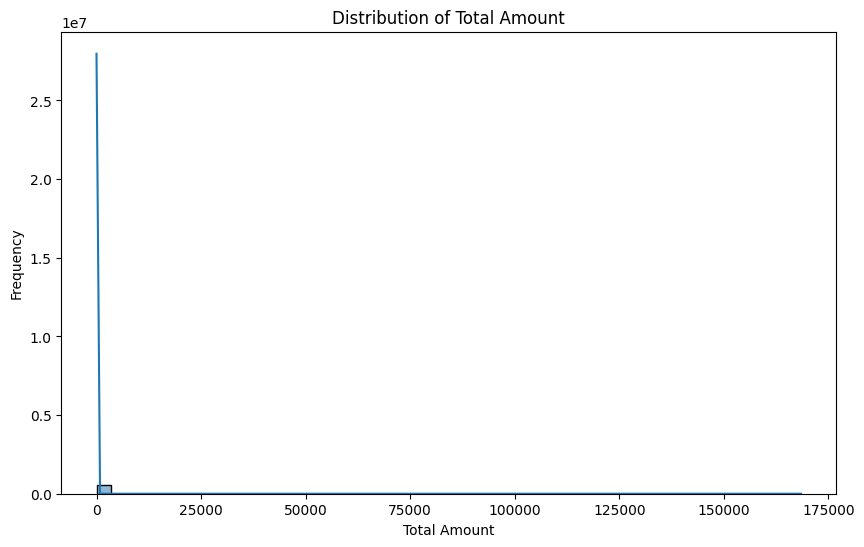

In [4]:
plt.style.use('default')

# Distribution of Total Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalAmount'], kde=True, bins=50)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.savefig('total_amount_distribution.png')
plt.show()

The plot shows reight-skewed results, where most transactions have low total amount. There are some high value outliers as well.

### 4.2. Top 10 Countries by Number of Transactions

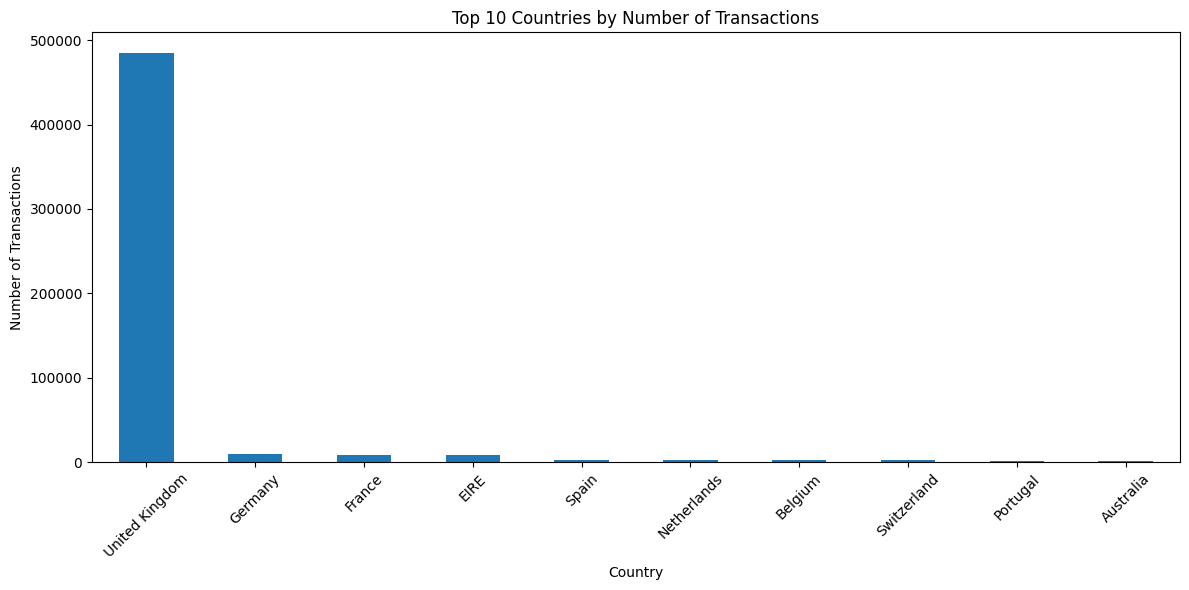

In [5]:
# Top 10 Countries by Number of Transactions
country_counts = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

The UK dominates the transactions. Germany and France and Ireland have much lower transactions volume.

### 4.3. Monthly Sales Trend

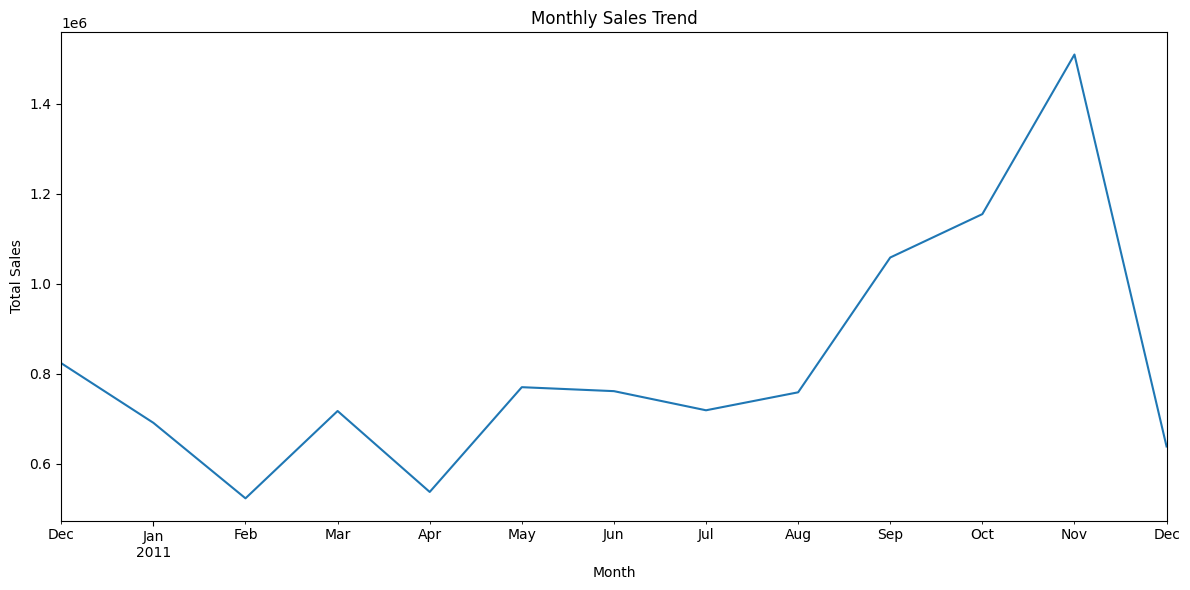

In [6]:
# Monthly Sales Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

There is an upward trend in sales from Aug to Nov. Feb has the lowest sales, and Dec shows a sharp decline.

### 4.4. Top 10 Best-Selling Products

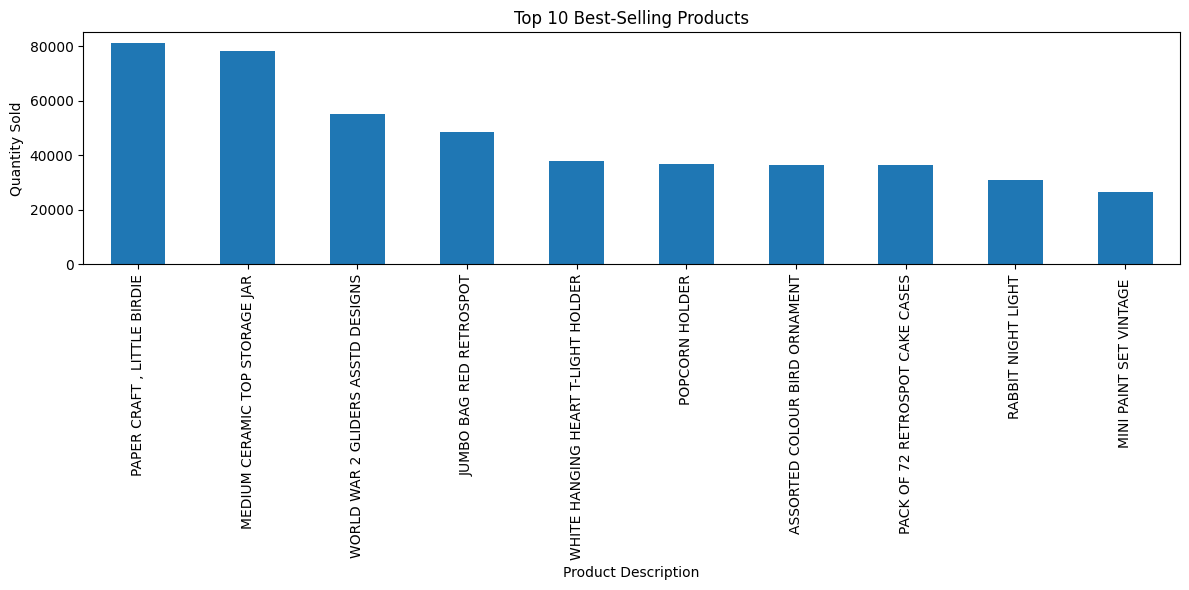

In [7]:
# Top 10 Best-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top_10_products.png')
plt.show()

Paper Craft items, storage jars and design related products seem to be more popular. The top selling item is Paper Craft, followed by Medium Ceramic top storage jar.

### 4.5. Correlation Heatmap

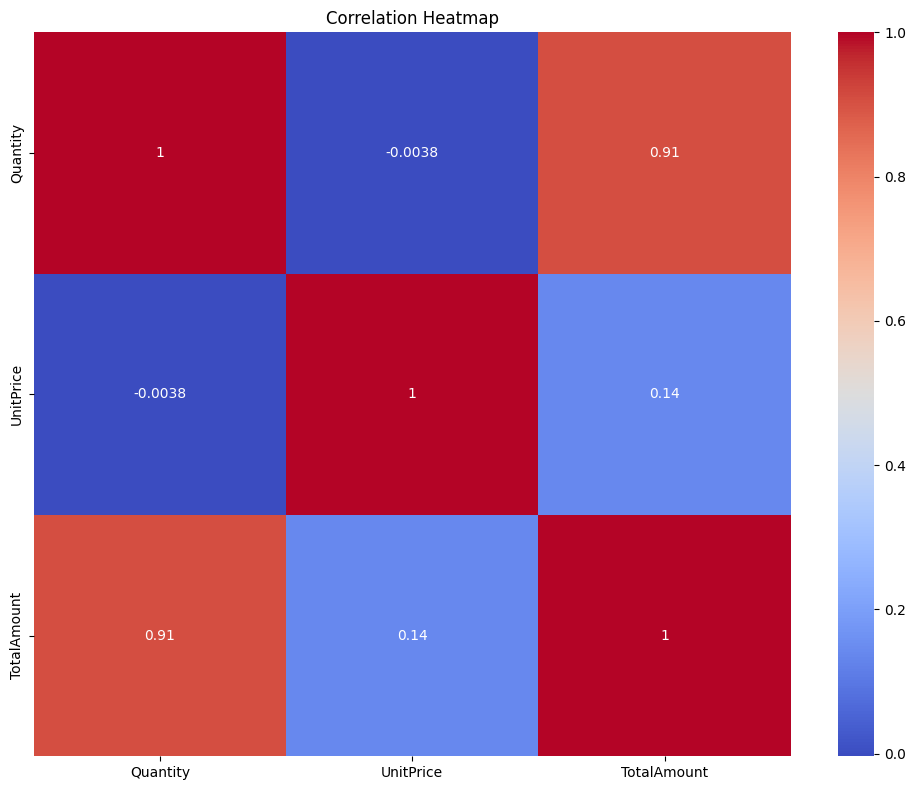

EDA completed. Visualizations have been saved as PNG files.


In [8]:
# Correlation Heatmap
numeric_columns = ['Quantity', 'UnitPrice', 'TotalAmount']
correlation = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

print("EDA completed. Visualizations have been saved as PNG files.")

There is strong correlation between Quantity and TotalAmount 0.91.
UnitPrice has week positive corrrelation with TotalAmount 0.14.
There is almost no correlation between Quantity and UnitPrice.

### 4.6. Additional statistics

In [9]:
# Additional statistics
print("\nTop 5 countries by total sales:")
print(df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head())

print("\nAverage order value:")
print(df.groupby('InvoiceNo')['TotalAmount'].sum().mean())

print("\nPercentage of transactions with CustomerID:")
print((df['HasCustomerID'].sum() / len(df)) * 100)


Top 5 countries by total sales:
Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalAmount, dtype: float64

Average order value:
534.403033266533

Percentage of transactions with CustomerID:
75.05772452198059


## 5. Feature Engineering
We'll start by creating RFM (Recency, Frequency, Monetary) features, add seasonality features, and create product categories.

### 5.1. RFM Analysis
Now we'll create RFM (Recency, Frequency, Monetary) features for each customer

In [10]:
# df = pd.read_csv('cleaned_online_retail.csv')
# Get the most recent date in the dataset
max_date = df['InvoiceDate'].max()

# Create a dataframe with one row per customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'  # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

### 5.2. Add Seasonality Features
Now let's add  seasonality features: Month, DayOfWeek, and IsWeekend

In [11]:
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

### 5.3. Create Product Categories
Now let's create a simple product categorization based on the product description

In [12]:
def categorize_product(description):
    description = description.lower()
    if 'paper' in description:
        return 'Paper Products'
    elif 'ceramic' in description or 'porcelain' in description:
        return 'Ceramics'
    elif 'metal' in description:
        return 'Metal Products'
    elif 'wood' in description:
        return 'Wooden Products'
    else:
        return 'Other'

df['ProductCategory'] = df['Description'].apply(categorize_product)

In [13]:
# Display the first few rows of the RFM dataframe and the updated main dataframe
print("RFM Dataframe:")
print(rfm.head())
print("\nUpdated Main Dataframe:")
print(df.head())

# Save the updated dataframe
df.to_csv('feature_engineered_online_retail.csv', index=False)
print("\nUpdated dataframe saved as 'feature_engineered_online_retail.csv'")

RFM Dataframe:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1        182   4310.00
12348.0          74         31   1797.24
12349.0          18         73   1757.55
12350.0         309         17    334.40

Updated Main Dataframe:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  HasCustomerID  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom           True   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           True   
2 2

## 6. Clustering analysis.
Now that we have performed feature engineering, we'll now perform clustering analysis. We'll perform two types of clustering:

- Customer segmentation using RFM features
- Product clustering based on sales patterns

### 6.1. Customer Segmentation using RFM features
Let's perform the customer segmentation, we'll start by normalizing the RFM fatures, then we'll determine the optimal  number of clusters using the elbow method and silhouette score. After that, we will perform K-means clustering with the optimal number of clusters and analyze the results.  

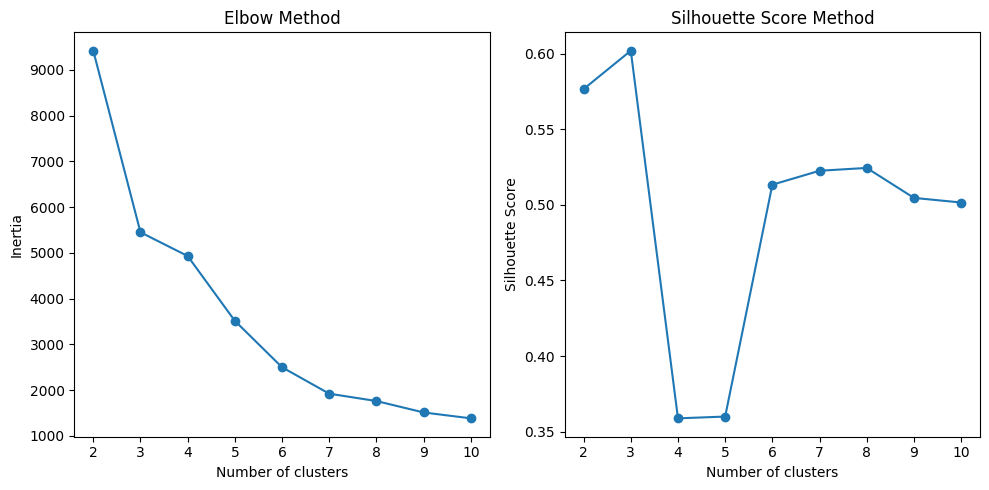

In [14]:
# Load the RFM dataframe
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'  # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Normalize the RFM features
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)

# Determine optimal number of clusters
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_normalized, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()



In Elbow Method there is a noteable decrease in inertia upto 4 or 5 clusters. After that the decrease is more gradual. In Silhouette Score Method, the socre peaks at 3 clusters and another smaller peaks show up at 6 clusters.

### 6.2. K-means with 3 Clusters
Based on above plots we can move on with 3 clusters as it has the highest silhouette score.

Customer Segment Summary:
         Recency  Frequency   Monetary
Cluster                               
0          40.38     103.09    2028.83
1         246.31      27.79     637.32
2           3.69    2565.31  126118.31


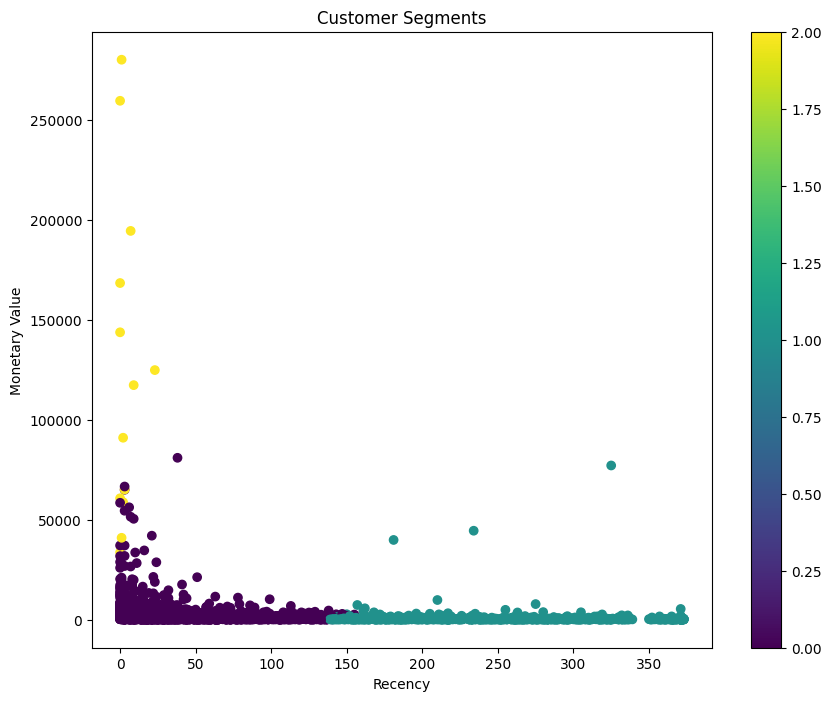

Customer segments saved to 'customer_segments.csv'


In [15]:
# Perform K-means clustering with 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Analyze the clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

print("Customer Segment Summary:")
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

# Save the clustered RFM dataframe
rfm.to_csv('customer_segments.csv')
print("Customer segments saved to 'customer_segments.csv'")

- The yellow dots(Cluster 2-VIP Customers) are concentrated in the upper left corner indicating recent purchases with high monetary values.
- The purple dots(Cluster 0 - Regular Customers) are spread accross the lower left and they indicate moderate recency and monetary values.
- The green dots (Cluster 1 - Inactive Customers) are mostly on the right side oindicating higher recency and lower monetary values.



### 6.3. Product Clustering
We'll now perform product clustering based on sales patterns, this will help group similar products together that can be useful for marketing strategies.

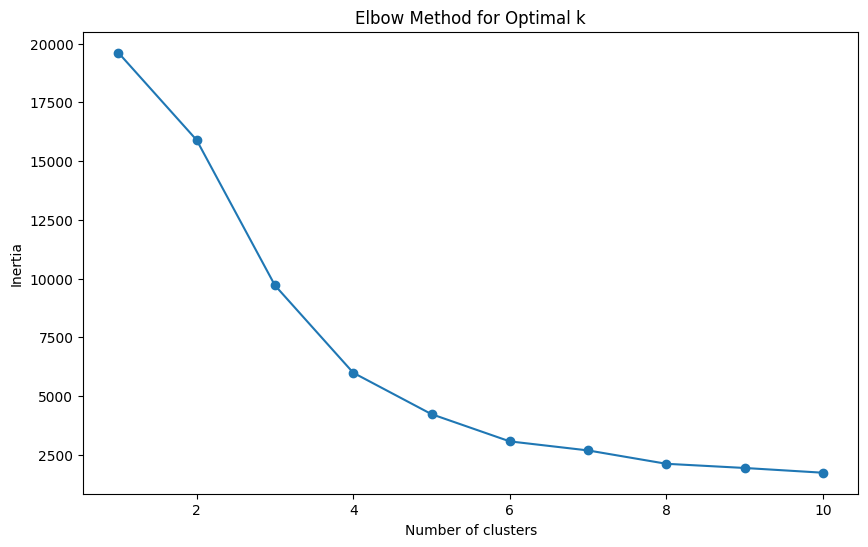

In [16]:
# df = pd.read_csv('feature_engineered_online_retail.csv')

# Aggregate product data
product_data = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'TotalAmount': 'sum',
    'ProductCategory': lambda x: x.mode().iloc[0]  # Most common category
})

# Calculate additional features
product_data['AvgOrderSize'] = df.groupby('StockCode')['Quantity'].mean()
product_data['OrderFrequency'] = df.groupby('StockCode').size()

# Normalize the features
features_to_normalize = ['Quantity', 'UnitPrice', 'TotalAmount', 'AvgOrderSize', 'OrderFrequency']
scaler = StandardScaler()
product_data_normalized = pd.DataFrame(scaler.fit_transform(product_data[features_to_normalize]),
                                       columns=features_to_normalize,
                                       index=product_data.index)

# Determine optimal number of clusters using elbow method
max_clusters = 10
inertias = []

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(product_data_normalized)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




### 6.4. K-means Clustering with 4 Clusters
Since, the optimal numbers of clusters is 4, we will now perfrom K-means with 4 clusters.

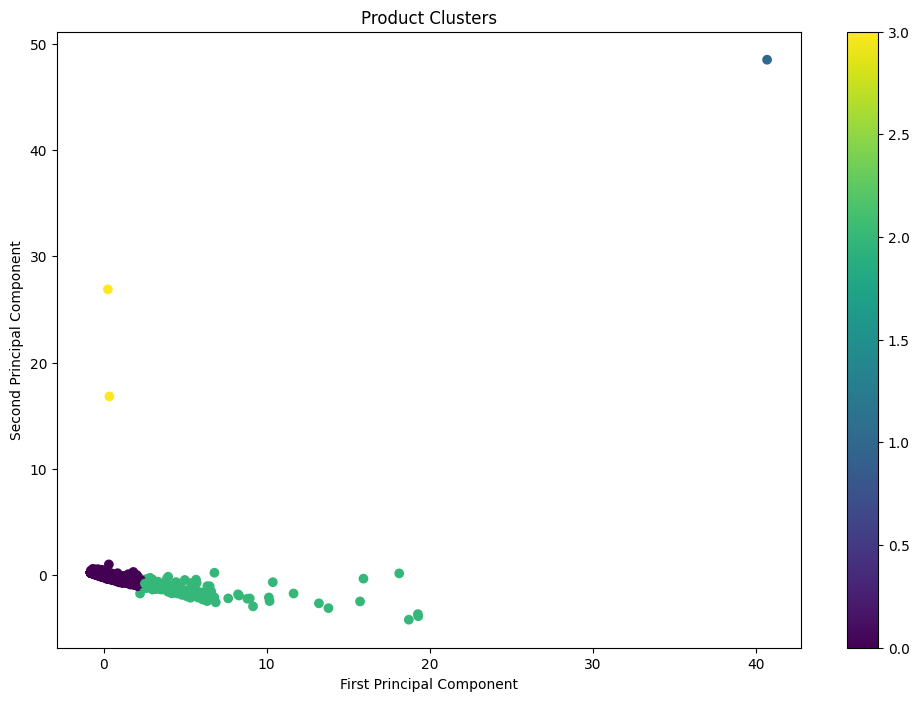

Product Cluster Summary:
         Quantity  UnitPrice  TotalAmount  AvgOrderSize  OrderFrequency  \
Cluster                                                                   
0          911.07       3.98      1579.11          8.24          102.41   
1        80995.00       2.08    168469.60      80995.00            1.00   
2        11159.18       6.10     24250.25         16.39          783.66   
3            1.50    8971.30     12411.58          1.00            1.50   

        ProductCategory  
Cluster                  
0                 Other  
1        Paper Products  
2                 Other  
3                 Other  
Product clusters saved to 'product_clusters.csv'


In [17]:
# Choose the optimal number of clusters
optimal_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
product_data['Cluster'] = kmeans.fit_predict(product_data_normalized)

# Use PCA for visualization
pca = PCA(n_components=2)
product_data_pca = pca.fit_transform(product_data_normalized)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(product_data_pca[:, 0], product_data_pca[:, 1], c=product_data['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Product Clusters')
plt.colorbar(scatter)
plt.show()

# Analyze the clusters
cluster_summary = product_data.groupby('Cluster').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalAmount': 'mean',
    'AvgOrderSize': 'mean',
    'OrderFrequency': 'mean',
    'ProductCategory': lambda x: x.value_counts().index[0]
}).round(2)

print("Product Cluster Summary:")
print(cluster_summary)

# Save the clustered product data
product_data.to_csv('product_clusters.csv')
print("Product clusters saved to 'product_clusters.csv'")

## 7. PCA

we'll now perform dimensionality reduction using Principal Component Analysis (PCA). In this setp we will reduce the complexity of our dataset while retaining its most important features.

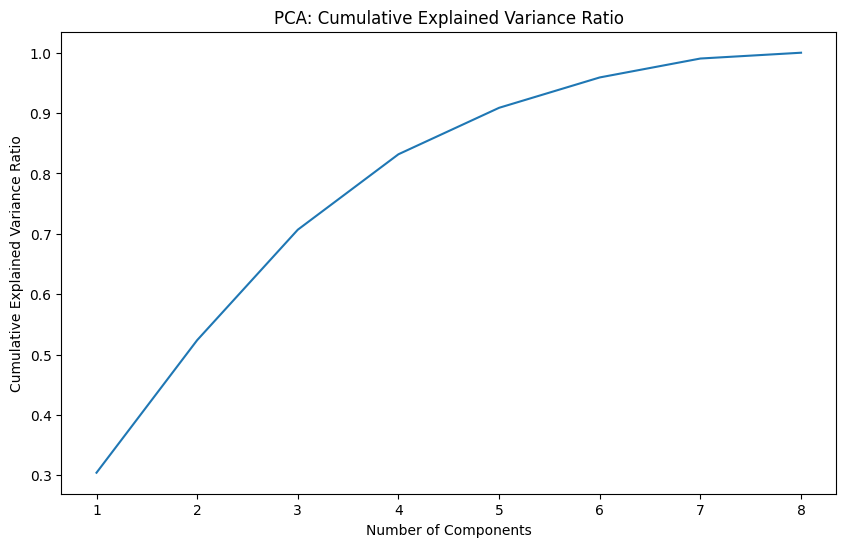

Number of components to keep: 6
PCA results saved to 'pca_results.csv'

First few rows of PCA results:
                  PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                             
12346.0     12.839521 -1.500050 -6.309557 -0.138809 -7.346723 -3.495265
12347.0      0.728126 -0.681071  0.721098 -0.063941  0.398164 -0.428420
12348.0      0.154394 -0.007981  0.296042  0.051121 -0.154856 -0.000633
12349.0      0.027052 -1.223803  1.744181  0.138720 -0.539373 -0.075840
12350.0     -0.924252 -1.256648 -2.662549 -0.139385  0.014229  0.089283

Explained variance ratio for each component:
PC1: 0.3044
PC2: 0.2195
PC3: 0.1829
PC4: 0.1250
PC5: 0.0770
PC6: 0.0503


In [18]:
# df = pd.read_csv('feature_engineered_online_retail.csv')

# Prepare the data for PCA
# Select numerical columns
numerical_columns = ['Quantity', 'UnitPrice', 'TotalAmount', 'Month', 'DayOfWeek', 'IsWeekend']

# Aggregate data by CustomerID
customer_data = df.groupby('CustomerID')[numerical_columns].agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'TotalAmount': 'sum',
    'Month': 'mean',
    'DayOfWeek': 'mean',
    'IsWeekend': 'mean'
})

# Add RFM features
customer_data['Recency'] = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (df['InvoiceDate'].max() - x).days)
customer_data['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Normalize the data
scaler = StandardScaler()
customer_data_normalized = pd.DataFrame(scaler.fit_transform(customer_data), columns=customer_data.columns, index=customer_data.index)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(customer_data_normalized)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components to keep: {n_components}")

# Apply PCA with the selected number of components
pca_final = PCA(n_components=n_components)
pca_result_final = pca_final.fit_transform(customer_data_normalized)

# Create a new dataframe with PCA results
pca_df = pd.DataFrame(data=pca_result_final, columns=[f'PC{i+1}' for i in range(n_components)], index=customer_data.index)

# Save the PCA results
pca_df.to_csv('pca_results.csv')
print("PCA results saved to 'pca_results.csv'")

# Display the first few rows of the PCA results
print("\nFirst few rows of PCA results:")
print(pca_df.head())

# Print the explained variance ratio for each component
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(pca_final.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

## 8. Final Clustering

Let's move on to the final clustering step using the PCA results:

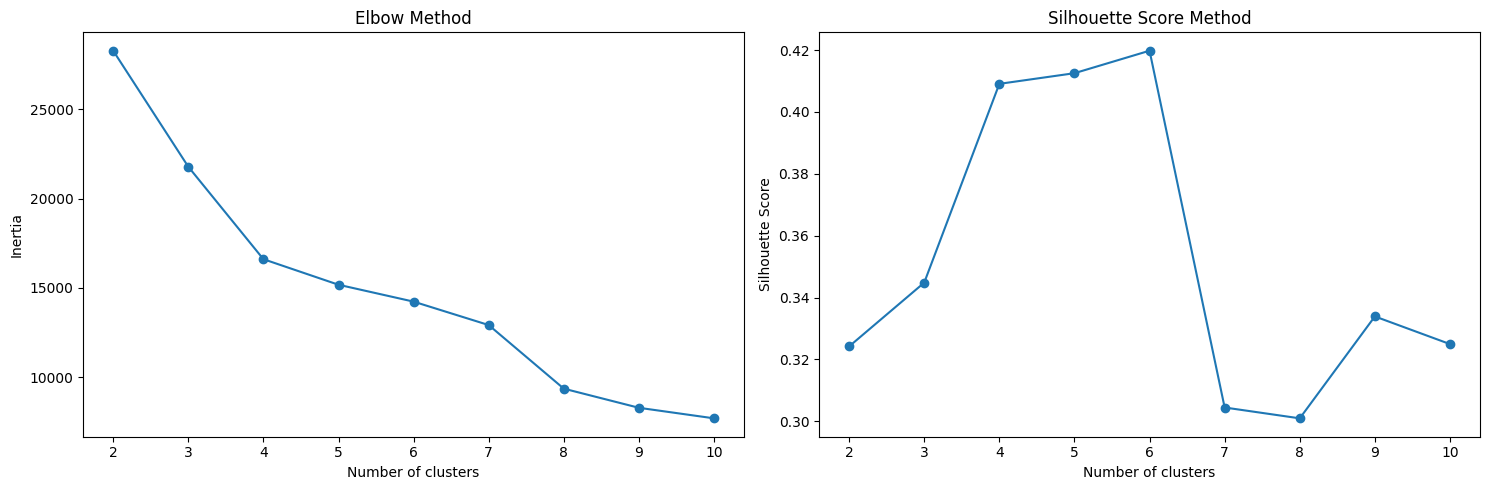

In [19]:
# pca_df = pd.read_csv('pca_results.csv', index_col='CustomerID')

# Determine optimal number of clusters
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(2, max_clusters + 1), inertias, marker='o')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Method')

plt.tight_layout()
plt.show()



### 8.1. Final Cluster Summary
 Based on above plots, we can go with either 4 or 6 clusters, I am choosing to go with 4 clusters.


In [20]:
# Choose optimal number of clusters
optimal_clusters = 4  

# Perform final clustering
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(pca_df)

# Add cluster labels to the original customer data
customer_data['Cluster'] = cluster_labels

# Analyze clusters
cluster_summary = customer_data.groupby('Cluster').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalAmount': 'mean',
    'Recency': 'mean',
    'Frequency': 'mean'
}).round(2)

print("Final Cluster Summary:")
print(cluster_summary)

# Save clustered customer data
customer_data.to_csv('customer_segments_final.csv')
print("Final customer segments saved to 'customer_segments_final.csv'")

Final Cluster Summary:
         Quantity  UnitPrice  TotalAmount  Recency  Frequency
Cluster                                                      
0         1219.54       3.52      2064.43    38.64       5.01
1          332.19       7.81       645.49   239.05       1.74
2        60841.21       4.46    106781.41    22.32      67.84
3          543.94       3.01       933.96    88.83       2.98
Final customer segments saved to 'customer_segments_final.csv'


## 9. Different Clustering Algorithms

Now it's time to perfrom and compare different clustering algorithms and analyze their performance using Silhouette Score.

We'll compare:
- K-means Clustering
- DBSCAn Clusteing
- Hierarchical Clustering


### 9.1. K-means Clustering
K-means is good for spherical clusters of similar size, we'll perform optimized K-means clustering through grid search.

Silhouette Score:
K-means: 0.2485


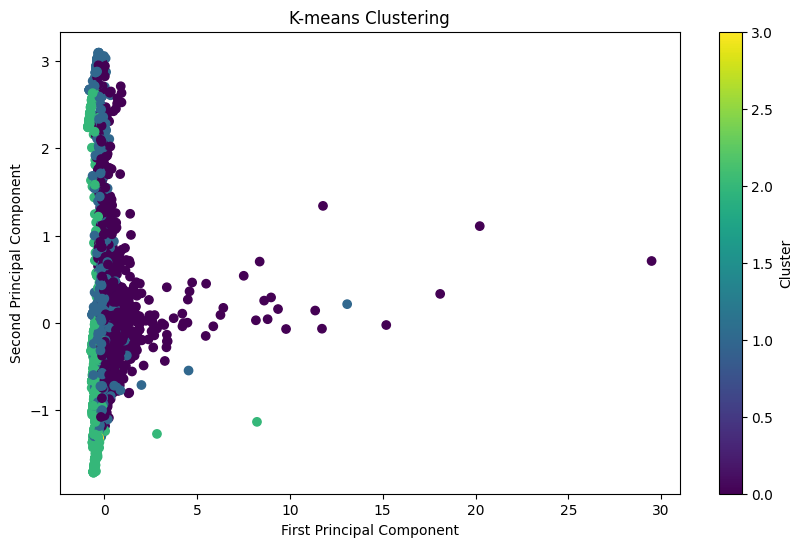

In [21]:
# pca_df = pd.read_csv('pca_results.csv', index_col='CustomerID')

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_df)

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)

print("Silhouette Score:")
print(f"K-means: {kmeans_silhouette:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

**K-means Clustering:**

- Shows distinct clusters with some overlap.
- Captures the main body of data and some outliers.

**Silhouette Scores:** 0.2485


### 9.2. DBSCAN Clustering
DBSCAN is excellent for finding clusters of arbitrary shape and identifying noise. we'll perform optimized DBSCAN clustering using the k-distance graph for epsilon selection.

Silhouette Score:
DBSCAN: 0.0178


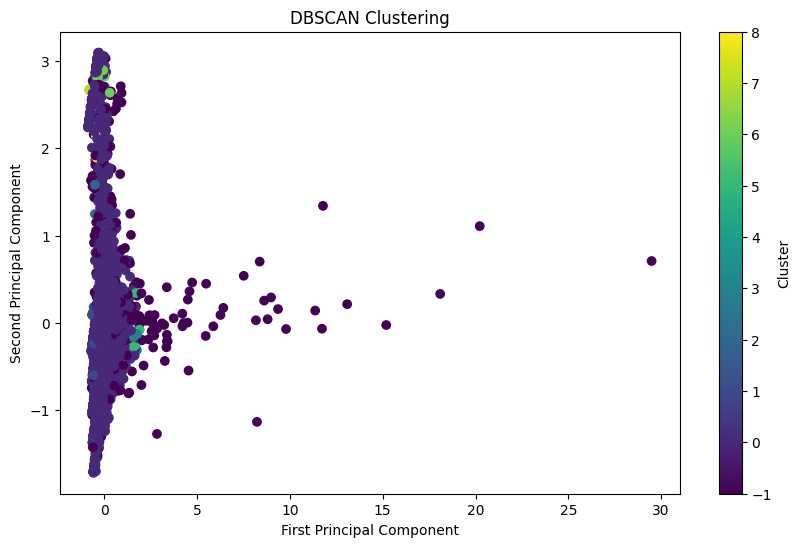

In [22]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
print("Silhouette Score:")
print(f"DBSCAN: {dbscan_silhouette:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

**Silhouette Scores:** 0.0178

**DBSCAN Clustering:**

- Appears to have identified most points as a single cluster (purple).
- Likely struggled with the varying densities in the data.



### 9.3. Hierarchical Clustering


Silhouette Score:
Hierarchical: 0.3511


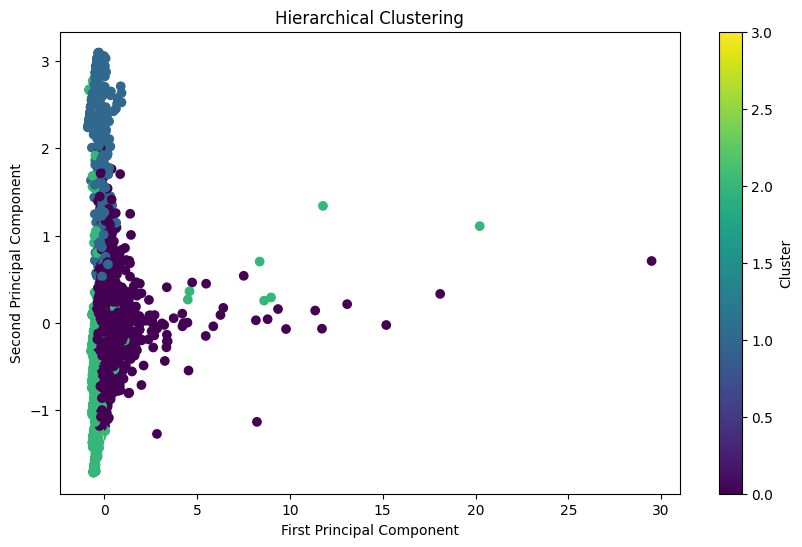

In [23]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(data_scaled)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
print("Silhouette Score:")
print(f"Hierarchical: {hierarchical_silhouette:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

**Silhouette Scores:** 0.3511

**Hierarchical Clustering:**

- Shows the clearest separation of clusters.
- Seems to have captured both the main groups and outliers effectively.


### 9.4. Compare Different Clustering Algorithms

Silhouette Scores:
K-means: 0.2485
DBSCAN: 0.0178
Hierarchical: 0.3511


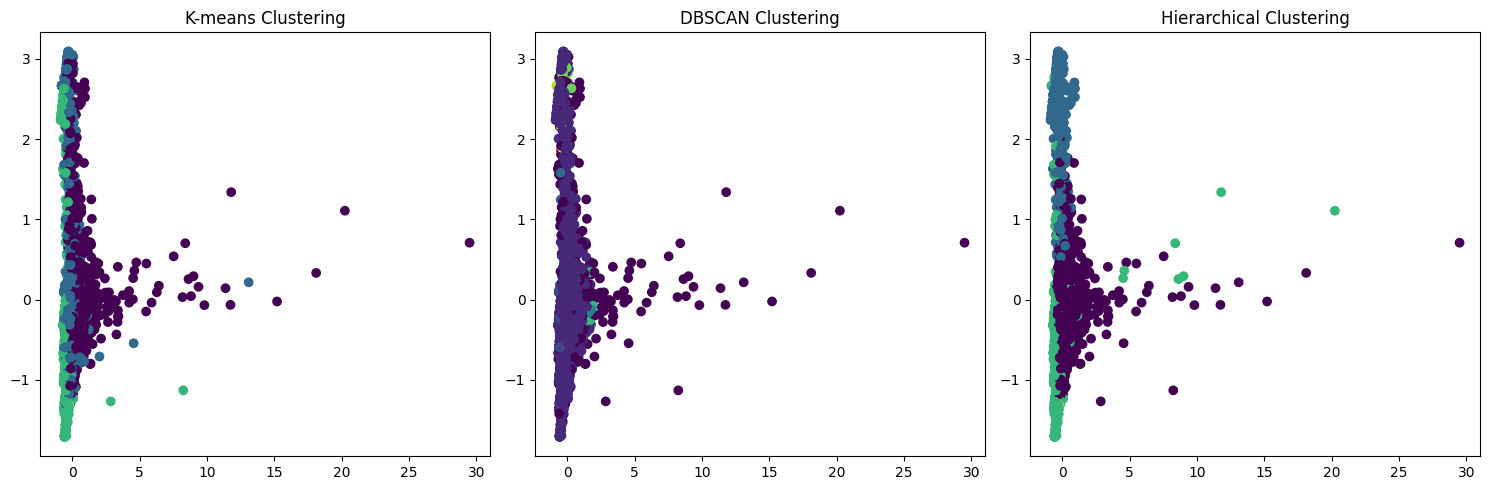

In [24]:
print("Silhouette Scores:")
print(f"K-means: {kmeans_silhouette:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f}")
print(f"Hierarchical: {hierarchical_silhouette:.4f}")

# Visualize clusters (using first two principal components)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(132)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(133)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

**Comparison Analysis**
- Hierarchical Clustering performed best with the highest silhouette score (0.3511) and the most visually distinct clusters. 
- K-means performed reasonably well, with a silhouette score of 0.2485. It identified distinct clusters but with more overlap than hierarchical clustering.
- DBSCAN performed poorly on this dataset, with a very low silhouette score (0.0178).

## 10. Hyperparameter Tuning

Based on the reults and analysis, we know that hierarchical clustering performed the best so now we'll perform hyperparameter tuning for hierarchical clustering. I'll focus on the key parameters that don't require extensive computational time.

We'll:

- Test different numbers of clusters (2 to 10) and linkage methods (ward, complete, average).
- Calculate the silhouette score for each combination.
- Find and print the best parameters.
- Plot the silhouette scores for different numbers of clusters and linkage methods.
- Apply the best parameters to create a final clustering.
- Visualize the final clustering using the first two principal components.

Best parameters:
Number of clusters: 2
Linkage method: ward
Silhouette score: 0.9578


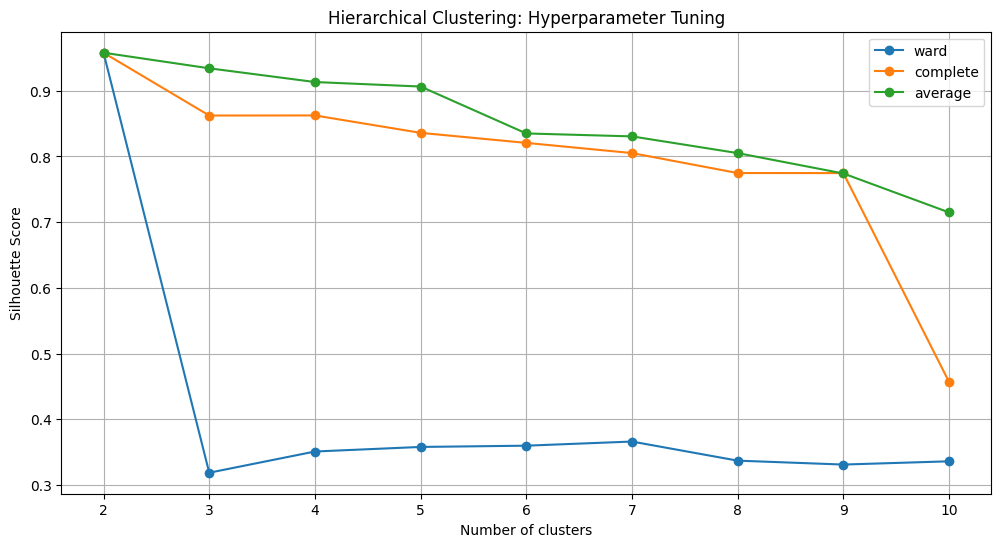

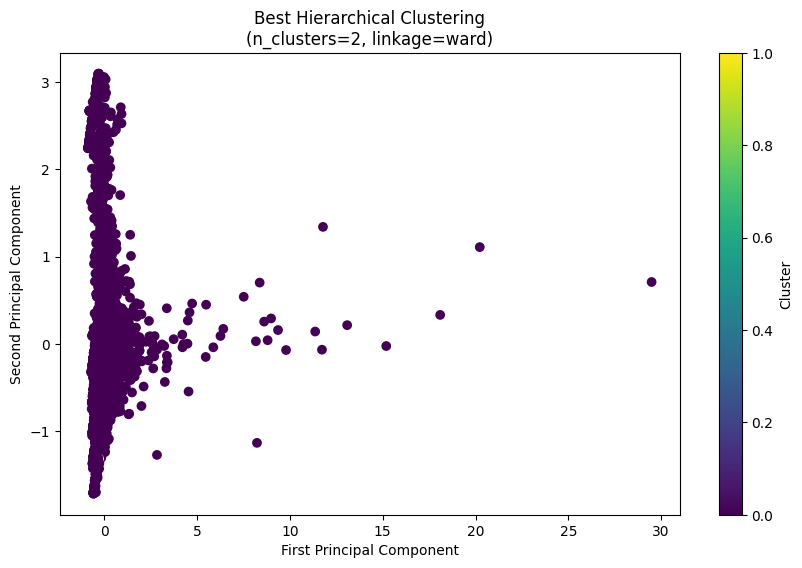

In [25]:
# pca_df = pd.read_csv('pca_results.csv', index_col='CustomerID')
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(pca_df)

# Parameters to tune
n_clusters_range = range(2, 11)
linkage_methods = ['ward', 'complete', 'average']

# Store results
results = []

for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hierarchical.fit_predict(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, labels)
        results.append((n_clusters, linkage, silhouette_avg))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['n_clusters', 'linkage', 'silhouette_score'])

# Find best parameters
best_result = results_df.loc[results_df['silhouette_score'].idxmax()]
print("Best parameters:")
print(f"Number of clusters: {best_result['n_clusters']}")
print(f"Linkage method: {best_result['linkage']}")
print(f"Silhouette score: {best_result['silhouette_score']:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
for linkage in linkage_methods:
    linkage_results = results_df[results_df['linkage'] == linkage]
    plt.plot(linkage_results['n_clusters'], linkage_results['silhouette_score'], marker='o', label=linkage)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering: Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()

# Apply best parameters
best_hierarchical = AgglomerativeClustering(n_clusters=best_result['n_clusters'], linkage=best_result['linkage'])
best_labels = best_hierarchical.fit_predict(data_scaled)

# Visualize best clustering (using first two PCA components)
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=best_labels, cmap='viridis')
plt.title(f'Best Hierarchical Clustering\n(n_clusters={best_result["n_clusters"]}, linkage={best_result["linkage"]})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

## 11. Results and Analysis

**Best Parameters:**

- Number of clusters: 2
- Linkage method: ward
- Silhouette score: 0.9578


This is a very high silhouette score, indicating that the clusters are well-defined and separated.

**Hyperparameter Tuning:**

- The 'ward' linkage method performs best for 2 clusters but drops significantly for higher cluster numbers.
- 'Complete' and 'average' linkage methods show more consistent performance across different numbers of clusters, with 'average' slightly outperforming 'complete' in most cases.
- All methods show a general trend of decreasing silhouette scores as the number of clusters increases, which is expected.


**Best Hierarchical Clustering:**

- The plot shows two distinct clusters: a dense cluster near the origin and a sparse cluster of outliers.
- The majority of data points are concentrated in the dense cluster, while a few points are scattered far from the main cluster.


## 12. Conclusion
This unsupervised machine learning project successfully segmented the online retail customer base into two distinct groups. The high silhouette score of 0.9578 indicates well-defined and separated clusters, providing a strong foundation for targeted business strategies. By leveraging these insights, the online retail business can enhance its marketing effectiveness, improve customer satisfaction, and potentially increase revenue.

## 13. Future Work

Our project does a good job at customer segmentationto derive business insights however, there is still room for improvment, we can implement following strategies for future work:

1. We can conduct deeper analysis of the main customer group to identify potential sub-segments
2. we can incorporate additional data sources, such as customer demographics or website behavior
3. We can develop a predictive model to forecast customer segment transitions
4. We can also implement A/B testing of marketing strategies based on the identified segments
